In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_log_error
train = pd.read_csv("/Users/inder/Downloads/nomad2018-predict-transparent-conductors/train.csv")
sample_submission = pd.read_csv("/Users/inder/Downloads/nomad2018-predict-transparent-conductors/sample_submission.csv")
test = pd.read_csv("/Users/inder/Downloads/nomad2018-predict-transparent-conductors/test.csv")

In [164]:
train

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.0000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.0000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.0000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.2500,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.3750,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2396,33,40.0,0.7500,0.2500,0.0000,4.9469,8.5014,9.1298,90.0038,90.0023,90.0015,0.0381,3.7349
2396,2397,167,30.0,0.4167,0.5833,0.0000,4.9566,4.9562,13.4178,89.9938,90.0075,120.0007,0.0670,3.4915
2397,2398,206,80.0,0.4375,0.5625,0.0000,9.2204,9.2200,9.2199,90.0047,90.0046,89.9954,0.0906,3.2750
2398,2399,33,80.0,0.3125,0.1875,0.5000,10.6529,9.0954,9.7210,90.0015,89.9996,90.0004,0.2566,1.3915


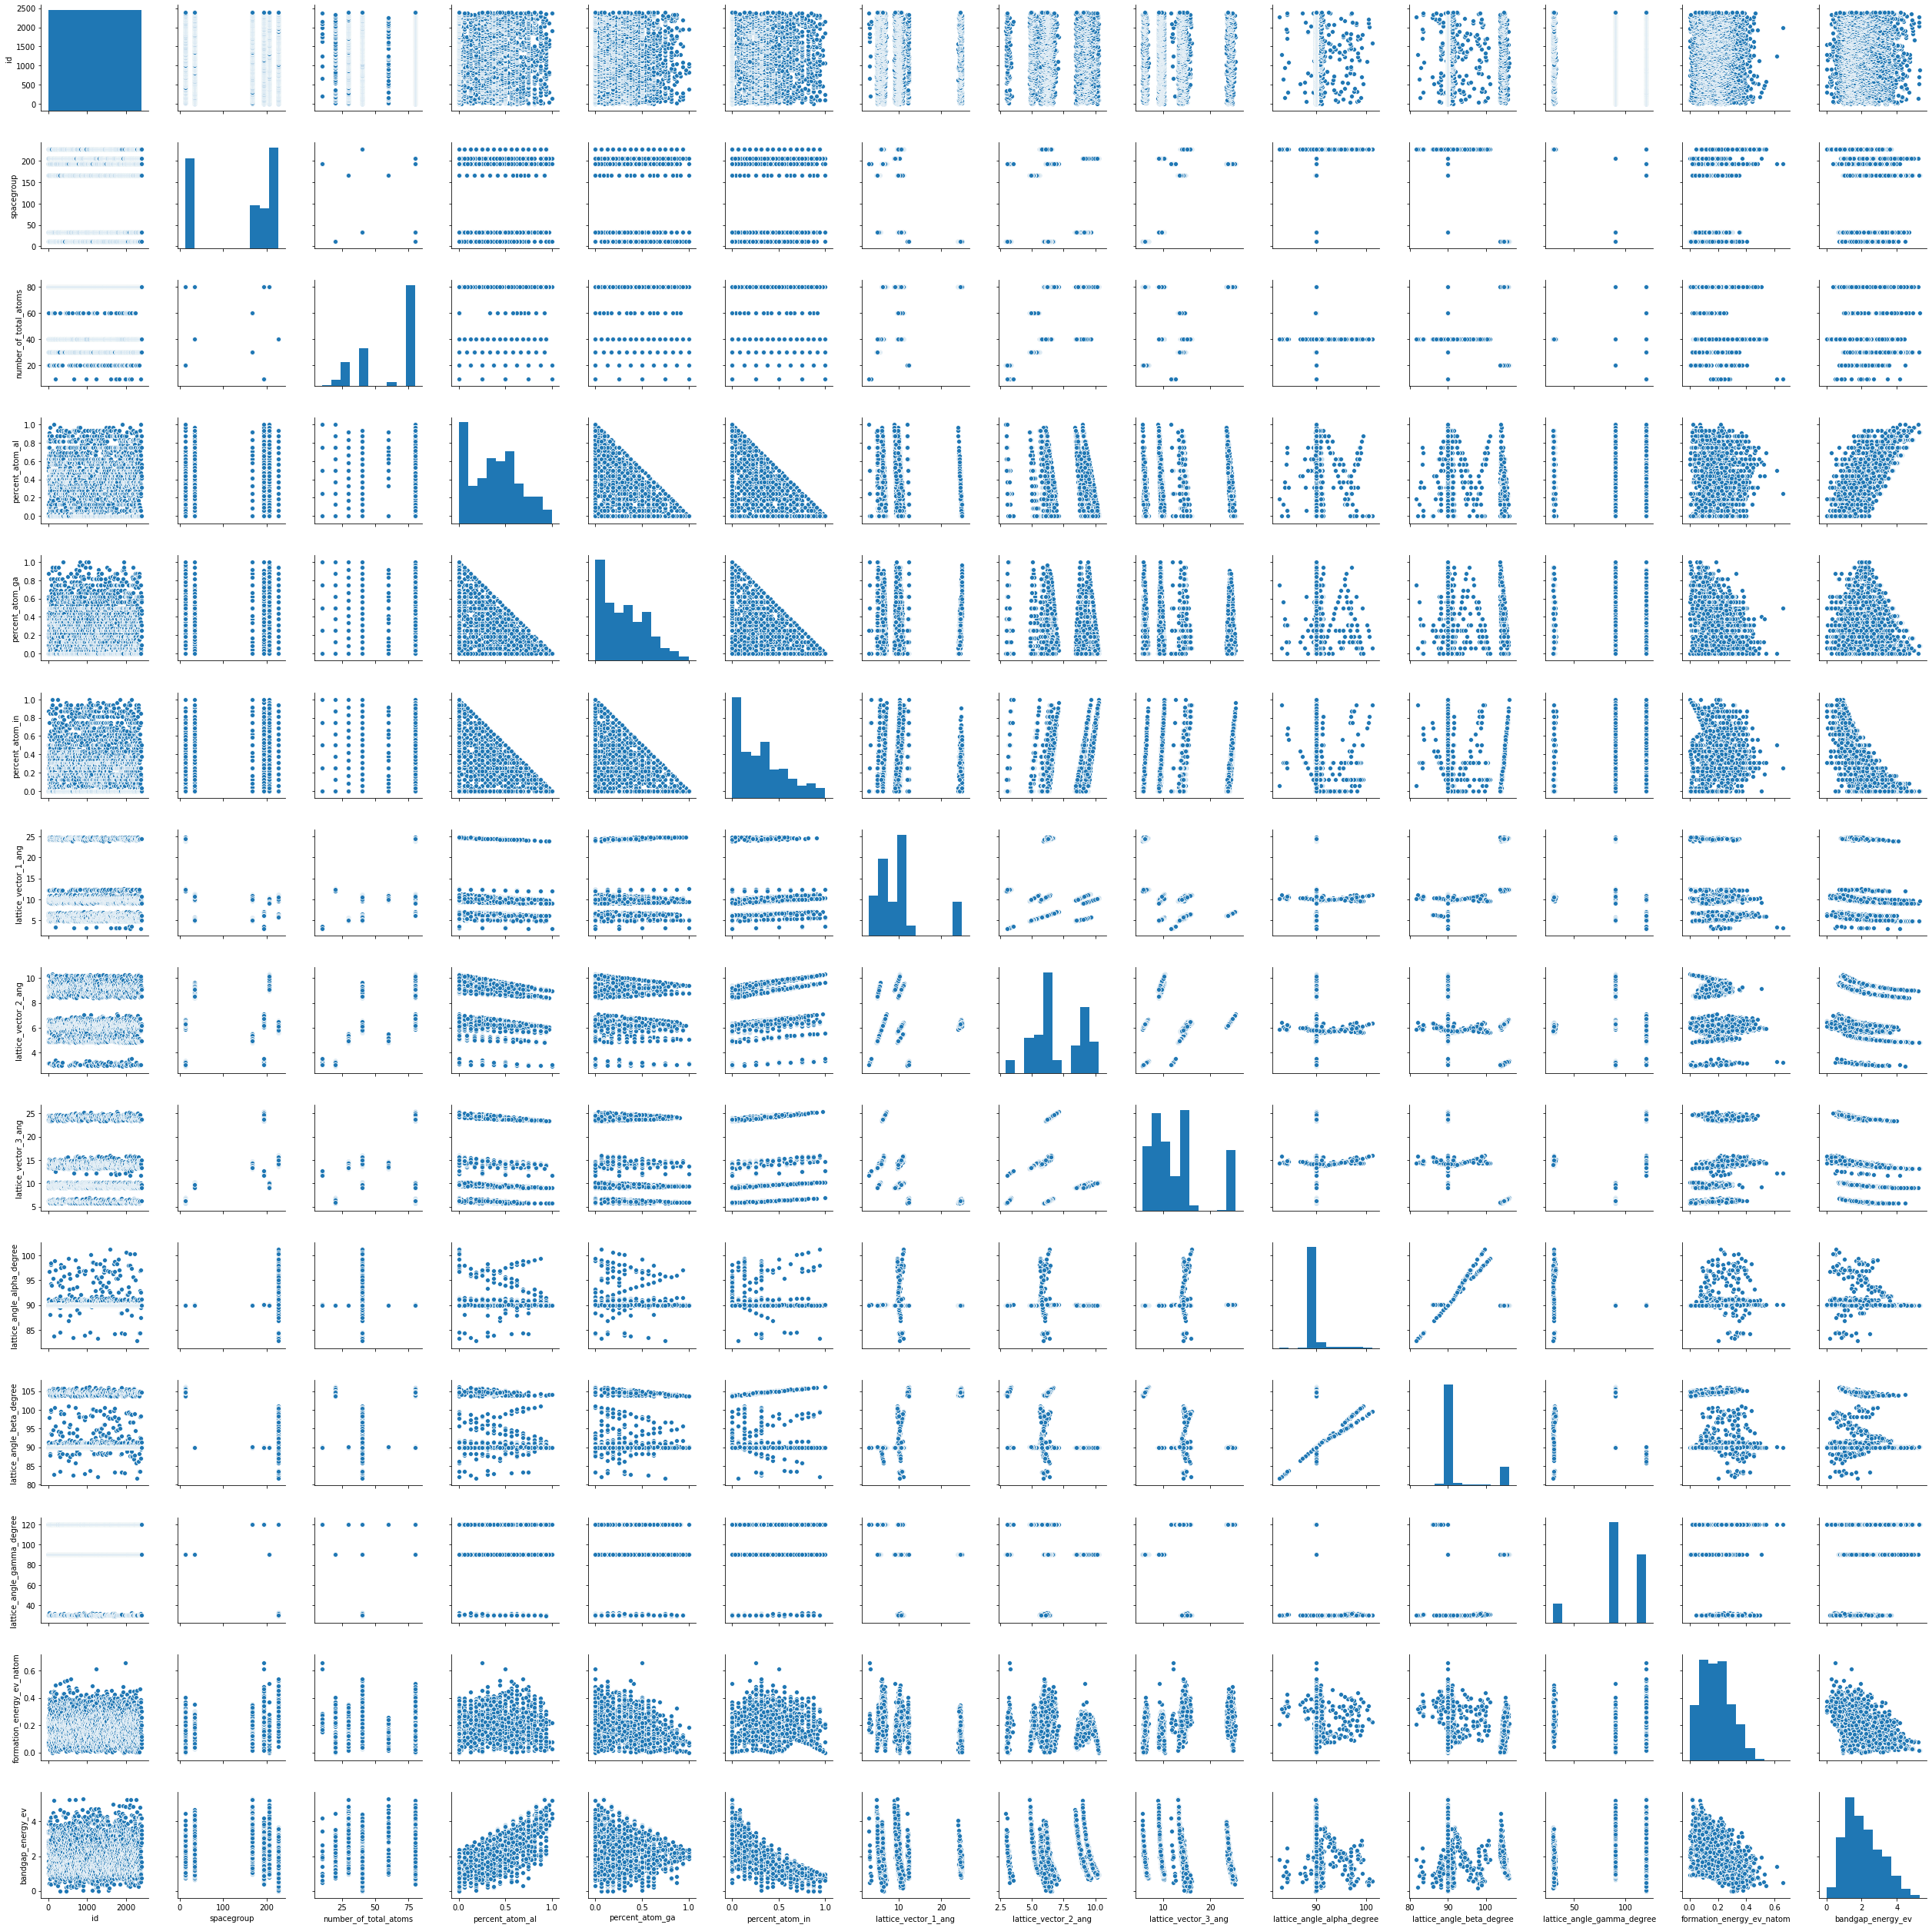

In [117]:
import seaborn as sns
sns.pairplot(train)

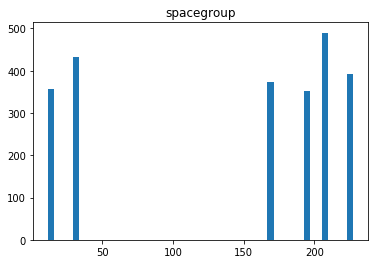

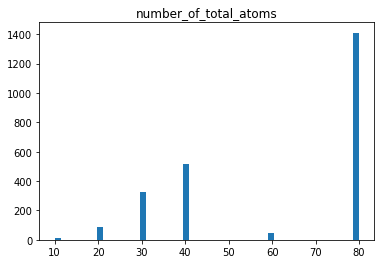

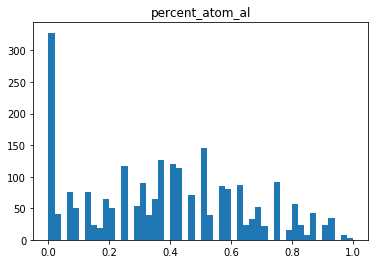

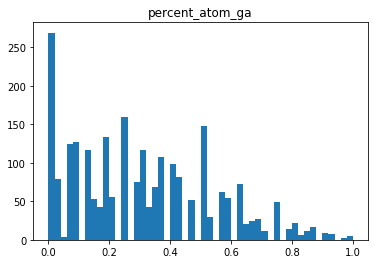

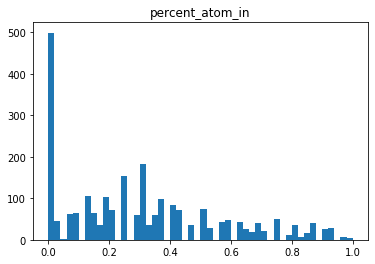

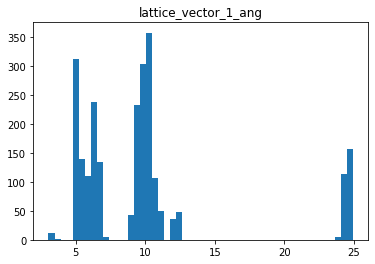

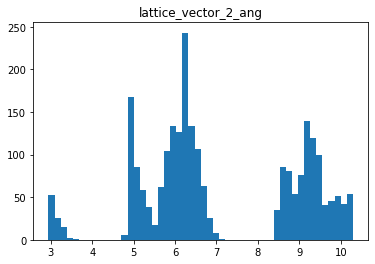

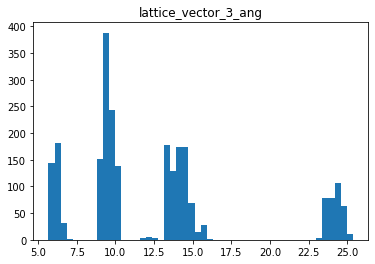

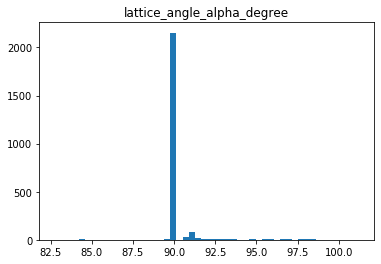

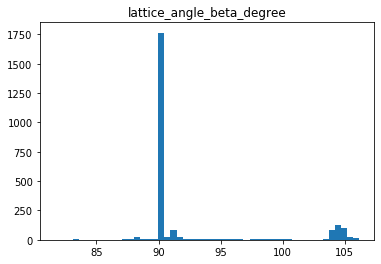

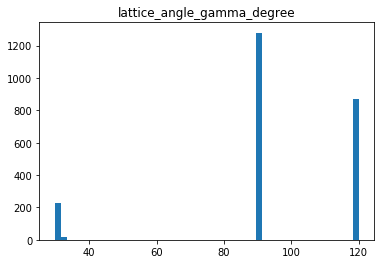

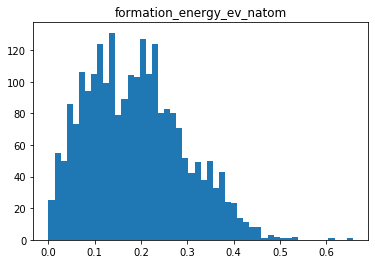

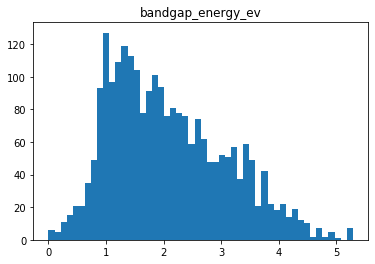

In [172]:
columns = train.columns[1:]
for col in columns:
    plt.hist(train[col] , bins=50)
    plt.title(col)
    plt.show()

In [173]:
columns = train.columns[1:]
for col in columns:
    print("\n\n",col,"\n",train[col].value_counts())



 spacegroup 
 206    490
33     432
227    393
167    374
12     358
194    353
Name: spacegroup, dtype: int64


 number_of_total_atoms 
 80.0    1410
40.0     519
30.0     326
20.0      84
60.0      48
10.0      13
Name: number_of_total_atoms, dtype: int64


 percent_atom_al 
 0.0000    328
0.5000    145
0.3750    126
0.2500    117
0.4375    114
0.7500     91
0.3125     90
0.6250     87
0.5625     86
0.0625     76
0.1250     76
0.4062     71
0.4688     71
0.1875     65
0.3438     64
0.8125     56
0.2812     54
0.6875     52
0.2188     51
0.4167     49
0.8750     43
0.0312     41
0.5833     41
0.5938     40
0.5312     40
0.3333     39
0.0938     37
0.9375     34
0.6667     33
0.1562     24
0.8333     24
0.6562     24
0.7188     21
0.1667     18
0.7812     16
0.9062     15
0.0833     13
0.8438      8
0.9167      8
0.9688      8
1.0000      3
0.7083      1
Name: percent_atom_al, dtype: int64


 percent_atom_ga 
 0.0000    269
0.2500    159
0.5000    148
0.1875    133
0.0625    125
0.31

In [176]:
train["percent_atom_al_is_Zero"] = (train["percent_atom_al"]==0).astype(int)
train["percent_atom_ga_is_Zero"] = (train["percent_atom_ga"]==0).astype(int)
train["percent_atom_in_is_Zero"] = (train["percent_atom_in"]==0).astype(int)

In [177]:
train["lattice_1/lattice_2"] = train["lattice_vector_1_ang"]/train["lattice_vector_2_ang"]
train["lattice_1/lattice_3"] = train["lattice_vector_1_ang"]/train["lattice_vector_3_ang"]
train["lattice_2/lattice_3"] = train["lattice_vector_2_ang"]/train["lattice_vector_3_ang"]

In [178]:
train["lattice_1/lattice_2|is_1"]=((train["lattice_1/lattice_2"]>0.8)&(train["lattice_1/lattice_2"]<1.2)).astype(int)
train["lattice_1/lattice_3|is_1"]=((train["lattice_1/lattice_3"]>0.8)&(train["lattice_1/lattice_3"]<1.2)).astype(int)
train["lattice_2/lattice_3|is_1"]=((train["lattice_2/lattice_3"]>0.8)&(train["lattice_2/lattice_3"]<1.2)).astype(int)

In [179]:
train["alpha_is_90"] = ((train["lattice_angle_alpha_degree"]<91)&(train["lattice_angle_alpha_degree"]>89)).astype(int)
train["beta_is_90"] = ((train["lattice_angle_beta_degree"]<91)&(train["lattice_angle_beta_degree"]>89)).astype(int)
train["gamma_is_30"] = ((train["lattice_angle_gamma_degree"]<32)&(train["lattice_angle_gamma_degree"]>28)).astype(int)
train["gamma_is_90"] = ((train["lattice_angle_gamma_degree"]<91)&(train["lattice_angle_gamma_degree"]>89)).astype(int)
train["gamma_is_120"] = ((train["lattice_angle_gamma_degree"]<122)&(train["lattice_angle_gamma_degree"]>118)).astype(int)

In [180]:
train["a90_b90"] = ((train["lattice_angle_alpha_degree"]<91) & (train["lattice_angle_alpha_degree"] > 89) & 
                      (train["lattice_angle_beta_degree"]<91) & (train["lattice_angle_beta_degree"] > 89)).astype(int)

In [181]:
tr = pd.get_dummies(train[["spacegroup","number_of_total_atoms"]].astype(str))

In [182]:
colm = tr.columns
for col in colm:
    train[col] = tr[col]

In [187]:
X = normalize(train.drop(["id","formation_energy_ev_natom","bandgap_energy_ev"],axis=1))
y1 = train.formation_energy_ev_natom
y2 = train.bandgap_energy_ev

In [188]:
reg = linear_model.LinearRegression() 
reg.fit(X,y1)
y1_pred = reg.predict(X)
y1_pred

array([0.04737633, 0.20481992, 0.21774043, ..., 0.09880082, 0.20385487,
       0.19856358])

In [194]:
print("MEAN : ",y1.mean())
print("RMSE : ",(np.sum((y1_pred-y1)**(2))/len(y1))**(0.5))
print("%error : ",100*(((np.sum((y1_pred-y1)**(2))/len(y1))**(0.5))/y1.mean()))

MEAN :  0.1876137499999997
RMSE :  0.056891332170473985
%error :  30.32364747811612


In [195]:
reg = linear_model.LinearRegression() 
reg.fit(X,y2)
y2_pred = reg.predict(X)
y2_pred

array([3.75236634, 2.88075458, 2.79112131, ..., 3.06100414, 1.59949522,
       3.36589559])

In [196]:
print("MEAN : ",y2.mean())
print("RMSE : ",(np.sum((y2_pred-y2)**(2))/len(y2))**(0.5))
print("%error : ",100*(((np.sum((y2_pred-y2)**(2))/len(y2))**(0.5))/y2.mean()))

MEAN :  2.077205375000001
RMSE :  0.29890876601657046
%error :  14.389947648607942


In [210]:
mean_squared_log_error(y1,y1_pred+0.43)**0.5

0.31537974135972424

In [211]:
y2_pred.min()

-0.4220372827924166

In [ ]:
mean_squared_log_error(y2,y2_pred)**0.5

In [197]:
from sklearn.metrics import mean_squared_log_error

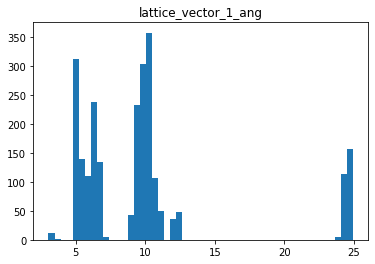

In [125]:
plt.hist(train["lattice_vector_1_ang"] , bins=50)
plt.title("lattice_vector_1_ang")
plt.show()

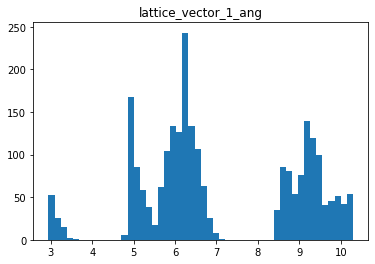

In [126]:
plt.hist(train["lattice_vector_2_ang"] , bins=50)
plt.title("lattice_vector_1_ang")
plt.show()

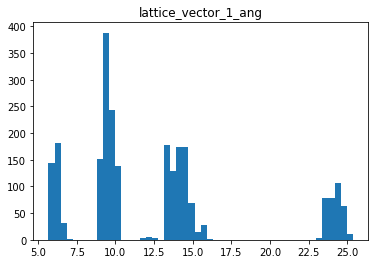

In [127]:
plt.hist(train["lattice_vector_3_ang"] , bins=50)
plt.title("lattice_vector_1_ang")
plt.show()

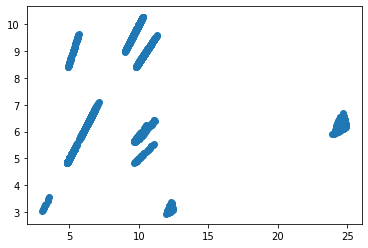

In [128]:
plt.scatter(train["lattice_vector_1_ang"],train["lattice_vector_2_ang"])

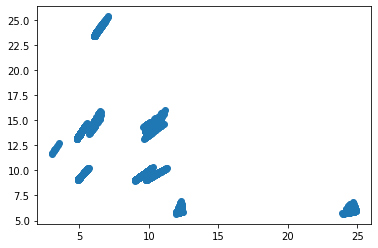

In [129]:
plt.scatter(train["lattice_vector_1_ang"],train["lattice_vector_3_ang"])

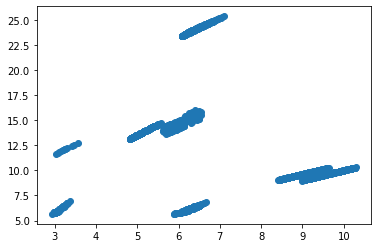

In [130]:
plt.scatter(train["lattice_vector_2_ang"],train["lattice_vector_3_ang"])

In [131]:
train[(train["lattice_vector_1_ang"]/train["lattice_vector_2_ang"] > 1.1) & (train["lattice_vector_1_ang"]
                            /train["lattice_vector_2_ang"] < 1.5)].lattice_vector_2_ang.count()

306

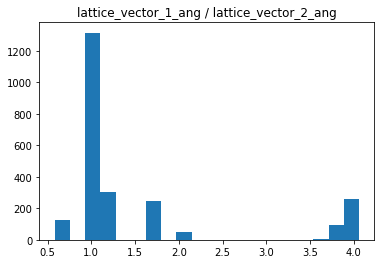

In [132]:
plt.hist(train["lattice_vector_1_ang"]/train["lattice_vector_2_ang"] , bins=20)
plt.title("lattice_vector_1_ang / lattice_vector_2_ang")
plt.show()

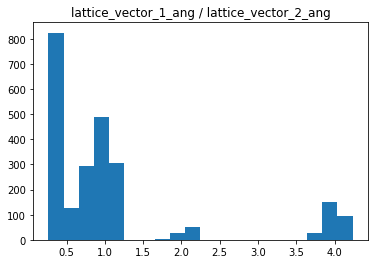

In [133]:
plt.hist(train["lattice_vector_1_ang"]/train["lattice_vector_3_ang"] , bins=20)
plt.title("lattice_vector_1_ang / lattice_vector_2_ang")
plt.show()

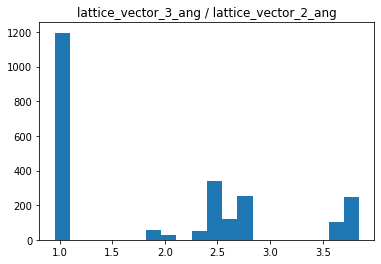

In [134]:
plt.hist(train["lattice_vector_3_ang"]/train["lattice_vector_2_ang"] , bins=20)
plt.title("lattice_vector_3_ang / lattice_vector_2_ang")
plt.show()

In [135]:
train[(train["lattice_angle_alpha_degree"]<91) & (train["lattice_angle_alpha_degree"] > 89)].id.count()

2228

In [136]:
train[(train["lattice_angle_alpha_degree"]<91) & (train["lattice_angle_alpha_degree"] > 89) & 
      (train["lattice_angle_beta_degree"]<91) & (train["lattice_angle_beta_degree"] > 89)].id.count()

1804

In [137]:
train[(train["lattice_angle_beta_degree"]<91) & (train["lattice_angle_beta_degree"] > 89)].id.count()

1804

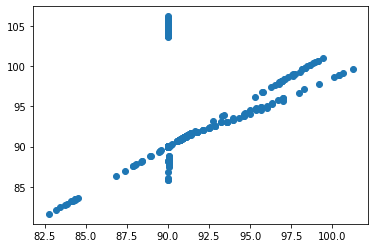

In [138]:
plt.scatter(train["lattice_angle_alpha_degree"],train["lattice_angle_beta_degree"])

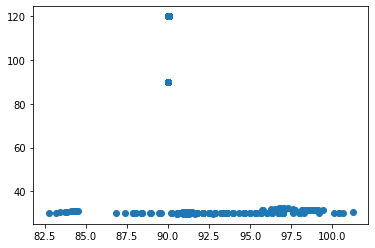

In [139]:
plt.scatter(train["lattice_angle_alpha_degree"],train["lattice_angle_gamma_degree"])

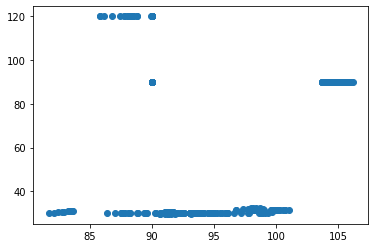

In [140]:
plt.scatter(train["lattice_angle_beta_degree"],train["lattice_angle_gamma_degree"])

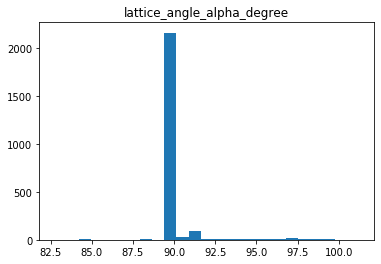

In [141]:
plt.hist(train["lattice_angle_alpha_degree"] , bins=25)
plt.title("lattice_angle_alpha_degree")
plt.show()

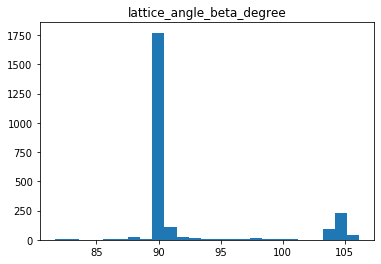

In [142]:
plt.hist(train["lattice_angle_beta_degree"] , bins=25)
plt.title("lattice_angle_beta_degree")
plt.show()

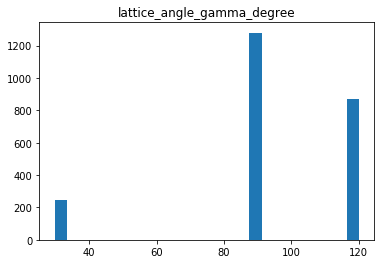

In [143]:
plt.hist(train["lattice_angle_gamma_degree"] , bins=25)
plt.title("lattice_angle_gamma_degree")
plt.show()

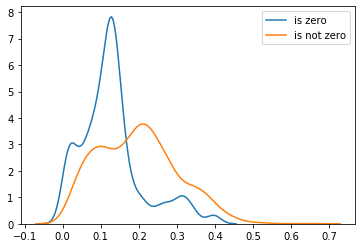

In [144]:
sns.kdeplot(train[train.percent_atom_al==0.0].formation_energy_ev_natom , label = 'is zero')
sns.kdeplot(train[train.percent_atom_al!=0.0].formation_energy_ev_natom , label = 'is not zero')

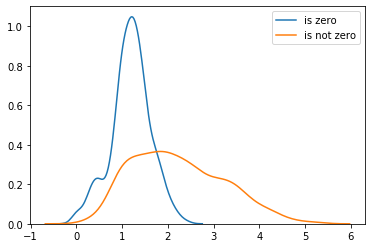

In [145]:
sns.kdeplot(train[train.percent_atom_al==0.0].bandgap_energy_ev , label = 'is zero')
sns.kdeplot(train[train.percent_atom_al!=0.0].bandgap_energy_ev , label = 'is not zero')

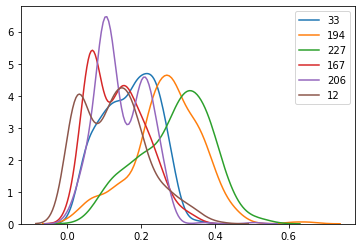

In [146]:
for i in train.spacegroup.unique():
    sns.kdeplot(train[train.spacegroup==i].formation_energy_ev_natom , label = str(i))

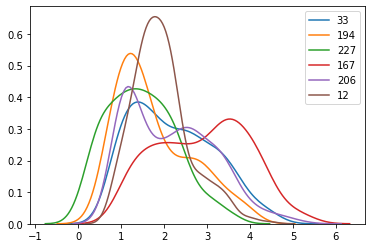

In [147]:
for i in train.spacegroup.unique():
    sns.kdeplot(train[train.spacegroup==i].bandgap_energy_ev , label = str(i))

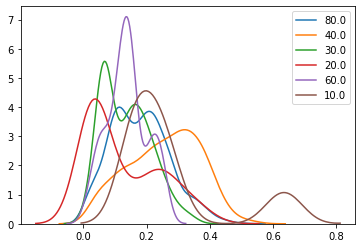

In [148]:
for i in train.number_of_total_atoms.unique():
    sns.kdeplot(train[train.number_of_total_atoms==i].formation_energy_ev_natom , label = str(i))

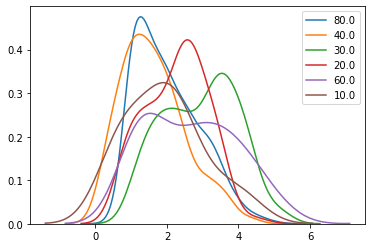

In [149]:
for i in train.number_of_total_atoms.unique():
    sns.kdeplot(train[train.number_of_total_atoms==i].bandgap_energy_ev , label = str(i))

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
import scipy

In [1]:
from sklearn.cluster import KMeans
import numpy as np
data=np.array(range(1000)).reshape(-1,1)/1000.
k=10
kwargs = {
    "n_clusters": k,
    "init":data[:k],
    "n_init":1,
    "tol":1e-4,
    "verbose":0
}
km1=KMeans(algorithm="elkan", **kwargs); km1.fit(data)
print(f"elkan: inertia= {km1.inertia_:10.7f} n_iter= {km1.n_iter_}")


km2=KMeans(algorithm="full",  **kwargs); km2.fit(data)
print(f"full:  inertia= {km2.inertia_:10.7f} n_iter= {km2.n_iter_}")


inside KMeans class in _Kmeans.py file at start 


inside KMeans class inside _init_ function in _Kmeans.py file at start 


inside KMeans class inside fit function in _Kmeans.py file at start 


inside KMeans class inside fit function in _Kmeans.py file before assining to self.algorithim


 algorithim assigined :  elkan 


 inside njobs=1 if statement 


inside _kmeans_single_elkan function in _Kmeans.py file at start 


inside _kmeans_single_elkan function in _Kmeans.py file before calling k_means_elkan function 

elkan: inertia=  0.8391108 n_iter= 147

inside KMeans class inside _init_ function in _Kmeans.py file at start 


inside KMeans class inside fit function in _Kmeans.py file at start 


inside KMeans class inside fit function in _Kmeans.py file before assining to self.algorithim


 algorithim assigined :  full 


 inside njobs=1 if statement 


inside _kmeans_single_lloyd function in _Kmeans.py file at start 


inside _kmeans_single_lloyd function in _Kmeans.py file before 

In [4]:
kwargs

{'n_clusters': 10, 'init': array([[0.   ],
        [0.001],
        [0.002],
        [0.003],
        [0.004],
        [0.005],
        [0.006],
        [0.007],
        [0.008],
        [0.009]]), 'n_init': 1, 'tol': 0.0001, 'verbose': 0}

In [7]:
for key, value in kwargs.items(): 
    print ("%s == %s" %(key, value))

n_clusters == 10
init == [[0.   ]
 [0.001]
 [0.002]
 [0.003]
 [0.004]
 [0.005]
 [0.006]
 [0.007]
 [0.008]
 [0.009]]
n_init == 1
tol == 0.0001


In [8]:
import scipy.sparse as sp
def _tolerance(X, tol):
    """Return a tolerance which is independent of the dataset"""
    if sp.issparse(X):
        variances = mean_variance_axis(X, axis=0)[1]
    else:
        variances = np.var(X, axis=0)
    return np.mean(variances) * tol

In [10]:
sp.issparse(data)

False

In [12]:
variances = np.var(data, axis=0)

In [16]:
np.mean(variances) * tol

8.333325e-06

In [15]:
tol=1e-4

In [17]:
from sklearn.utils import check_array

In [23]:
X = check_array([[1],[2],[3]], accept_sparse='csr', dtype=np.float64)

In [25]:
X = check_array(data, accept_sparse='csr', dtype=[np.float64, np.float32],
                        order='C', copy=True)

In [26]:
X

array([[0.   ],
       [0.001],
       [0.002],
       [0.003],
       [0.004],
       [0.005],
       [0.006],
       [0.007],
       [0.008],
       [0.009],
       [0.01 ],
       [0.011],
       [0.012],
       [0.013],
       [0.014],
       [0.015],
       [0.016],
       [0.017],
       [0.018],
       [0.019],
       [0.02 ],
       [0.021],
       [0.022],
       [0.023],
       [0.024],
       [0.025],
       [0.026],
       [0.027],
       [0.028],
       [0.029],
       [0.03 ],
       [0.031],
       [0.032],
       [0.033],
       [0.034],
       [0.035],
       [0.036],
       [0.037],
       [0.038],
       [0.039],
       [0.04 ],
       [0.041],
       [0.042],
       [0.043],
       [0.044],
       [0.045],
       [0.046],
       [0.047],
       [0.048],
       [0.049],
       [0.05 ],
       [0.051],
       [0.052],
       [0.053],
       [0.054],
       [0.055],
       [0.056],
       [0.057],
       [0.058],
       [0.059],
       [0.06 ],
       [0.061],
       [

In [30]:
hasattr('k-means++', '__array__')

False

In [67]:
from sklearn.utils.extmath import row_norms , squared_norm

In [68]:
x_squared_norms = row_norms([[1,2],[3,4]], squared=True)

In [6]:
x_squared_norms

NameError: name 'x_squared_norms' is not defined

In [70]:
from joblib import Parallel, delayed, effective_n_jobs

In [71]:
effective_n_jobs(None) == 1

True

In [72]:
for seed in seeds:
    # run a k-means once
    labels, inertia, centers, n_iter_ = kmeans_single(
        X, sample_weight, self.n_clusters,
        max_iter=self.max_iter, init=init, verbose=self.verbose,
        precompute_distances=precompute_distances, tol=tol,
        x_squared_norms=x_squared_norms, random_state=seed)
    # determine if these results are the best so far
    if best_inertia is None or inertia < best_inertia:
        best_labels = labels.copy()
        best_centers = centers.copy()
        best_inertia = inertia
        best_n_iter = n_iter_

NameError: name 'seeds' is not defined

In [73]:
a = np.array([[1.0,2.0,3.0],[4.0,5.0,6.0]])

In [74]:
center_shift = np.sqrt(np.sum((a) ** 2, axis=1))

In [75]:
center_shift

array([3.74165739, 8.77496439])

In [61]:
center_shift_total = np.sum(center_shift)

In [62]:
center_shift_total ** 2

156.66582063752801

In [63]:
center_shift_total = squared_norm(a)

In [64]:
center_shift_total

91.0

In [ ]:
np.sum(np.sqrt(np.sum((a) ** 2, axis=1))) ** 2

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.linear_model._logistic import LogisticRegression
import scipy.sparse as sp
from sklearn.utils._testing import assert_array_almost_equal
def test_sparsify():
    # Test sparsify and densify members.
    n_samples, n_features = iris.data.shape
    target = iris.target_names[iris.target]
    clf = LogisticRegression(random_state=0,max_iter=400).fit(iris.data, target)

    pred_d_d = clf.decision_function(iris.data)

    clf.sparsify()
    assert sp.issparse(clf.coef_)
    pred_s_d = clf.decision_function(iris.data)

    sp_data = sp.coo_matrix(iris.data)
    pred_s_s = clf.decision_function(sp_data)

    clf.densify()
    pred_d_s = clf.decision_function(sp_data)

    assert_array_almost_equal(pred_d_d, pred_s_d)
    assert_array_almost_equal(pred_d_d, pred_s_s)
    assert_array_almost_equal(pred_d_d, pred_d_s)
test_sparsify()

hi
